In [91]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [92]:
df=pd.DataFrame()

In [93]:
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [94]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot: xlabel='x1', ylabel='x2'>

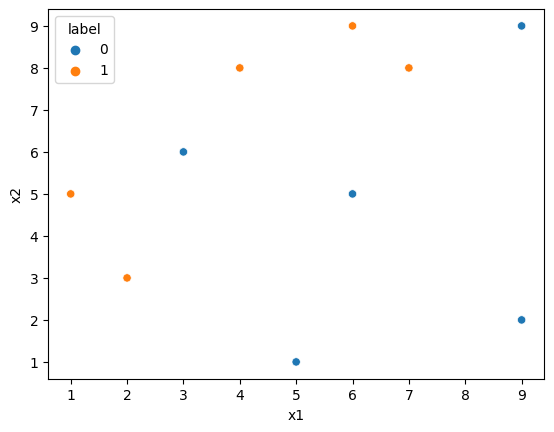

In [95]:
import seaborn as sns
sns.scatterplot(x=df['x1'],y=df['x2'],hue=df['label'])

In [96]:
df['weights']=1/df.shape[0]

In [97]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [98]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values


In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt1=DecisionTreeClassifier(max_depth=1)

In [101]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

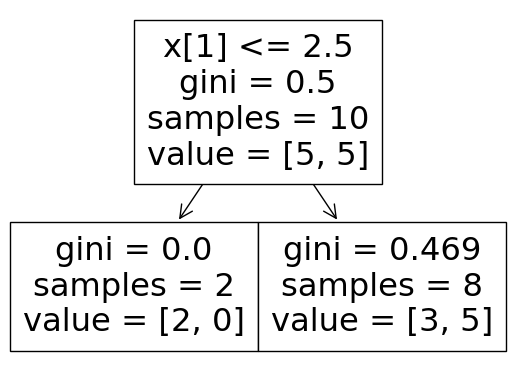

In [102]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot: >

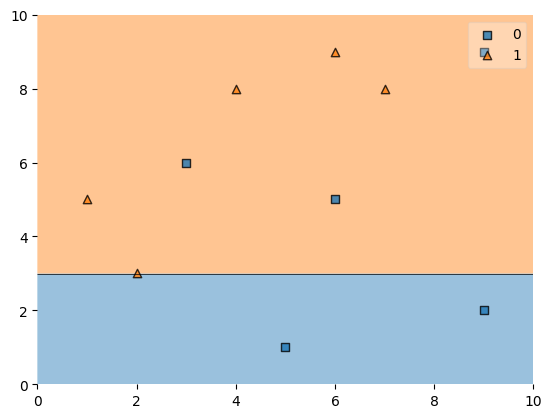

In [103]:
plot_decision_regions(X,y,clf=dt1)

In [104]:
df['y_pred']=dt1.predict(X)

In [105]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [106]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

# Calculating weights

In [107]:
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

# Updating weights

In [108]:
def update_row_weights(row,alpha=0.423):
    if row['label']== row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

# Upsampling

In [109]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [110]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [111]:
df['updated_weights'].sum()

0.9165153319682015

In [112]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [113]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [114]:
df['normalized_weights'].sum()

1.0

In [115]:
# calculating ranges
df['cumsum_upper']=np.cumsum(df['normalized_weights'])


In [116]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [117]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [118]:
def create_new_dataset(df):

    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [119]:
index_values=create_new_dataset(df)
index_values

[0, 1, 6, 0, 5, 2, 6, 8, 8, 2]

In [120]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [121]:
second_df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1


In [122]:
dt2=DecisionTreeClassifier(max_depth=1)

In [124]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [125]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]')]

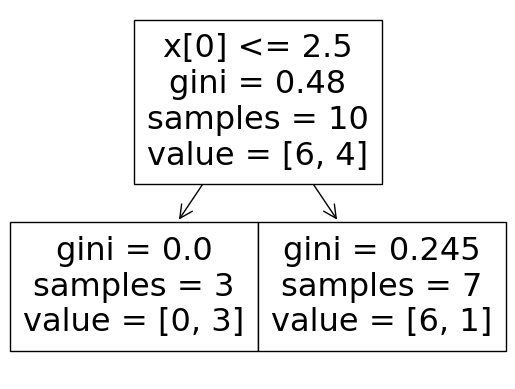

In [126]:
plot_tree(dt2)

<AxesSubplot: >

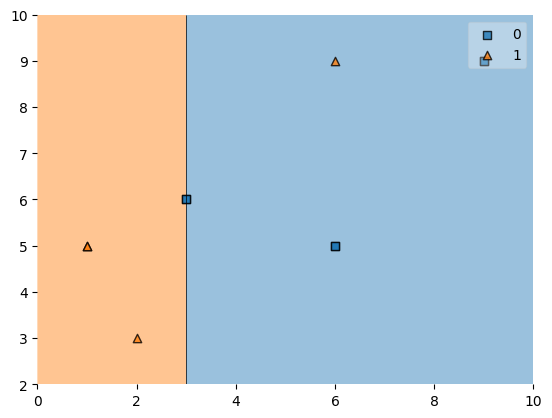

In [127]:
plot_decision_regions(X,y,clf=dt2)

In [128]:
second_df['y_pred']=dt2.predict(X)

In [129]:
second_df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
6,6,5,0,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
2,3,6,0,0.1,0


In [130]:
alpha2=calculate_model_weight(0.1)

In [131]:
alpha2

1.0986122886681098

In [133]:
# update row weights
def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [134]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [135]:
second_df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
5,6,9,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622


In [136]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [137]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
2,3,6,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034


In [138]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [139]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [140]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [142]:
second_df

,x1,x2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.033622,0.056034,0.056034,0.000000
1,2,3,1,0.1,1,0.033622,0.056034,0.112068,0.056034
6,6,5,0,0.1,0,0.033622,0.056034,0.168102,0.112068
0,1,5,1,0.1,1,0.033622,0.056034,0.224136,0.168102
5,6,9,1,0.1,0,0.297427,0.495694,0.719830,0.224136
2,3,6,0,0.1,0,0.033622,0.056034,0.775864,0.719830
6,6,5,0,0.1,0,0.033622,0.056034,0.831898,0.775864
8,9,9,0,0.1,0,0.033622,0.056034,0.887932,0.831898
8,9,9,0,0.1,0,0.033622,0.056034,0.943966,0.887932
2,3,6,0,0.1,0,0.033622,0.056034,1.000000,0.943966


In [143]:
index_values = create_new_dataset(second_df)

In [144]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [146]:
third_df

,x1,x2,label,weights
6,6,5,0,0.1
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1


In [148]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot: >

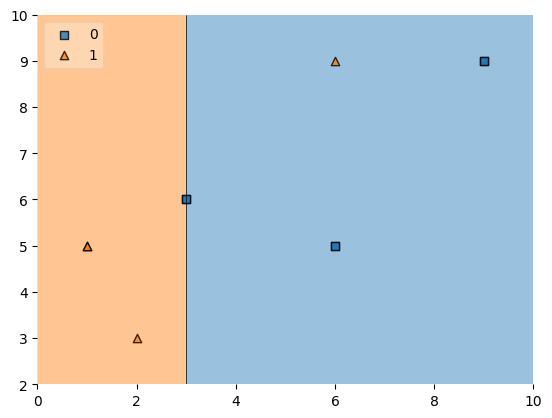

In [149]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [150]:
third_df['y_pred'] = dt3.predict(X)

In [151]:
third_df

,x1,x2,label,weights,y_pred
6,6,5,0,0.1,1
8,9,9,0,0.1,1
2,3,6,0,0.1,0
2,3,6,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0


In [152]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [153]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


# Prediction

In [154]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [155]:
query = np.array([1,5]).reshape(1,2)
dt2.predict(query)

array([1])

In [156]:
query = np.array([1,5]).reshape(1,2)
dt3.predict(query)

array([1])

In [157]:
alpha1*1+alpha2*1+alpha3*1

1.09861228866811

In [158]:
np.sign(1.09)

1.0

In [159]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [160]:
query = np.array([9,9]).reshape(1,2)
dt2.predict(query)

array([0])

In [161]:
query = np.array([9,9]).reshape(1,2)
dt3.predict(query)

array([0])

In [162]:
alpha1*1+alpha2*(-1)+alpha3*(-1)

-0.2513144282809062

In [163]:
np.sign(-0.25)

-1.0